# How to Choose the Number of Clusters

Using the same code as in the previous exercise, find the WCSS for clustering solutions with 1 to 10 clusters (you can try with more if you wish).

Find the most suitable solutions, run them and compare the results.

## Import the relevant libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## Load the data

Load data from the csv file: <i> 'Countries_exercise.csv'</i>.

In [6]:
raw_data = pd.read_csv('csv/Countries_exercise.csv')

Remove the duplicate index column from the dataset. 

In [9]:
data =raw_data.copy()

Plot the <i>'Longtitude'</i> and <i>'Latitude'</i> columns. 

## Plot the data

Plot the <i>'Longtitude'</i> and <i>'Latitude'</i> columns. 

<function matplotlib.pyplot.show(close=None, block=None)>

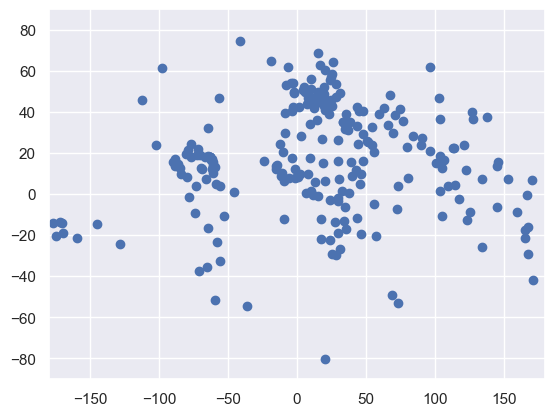

In [10]:
plt.scatter(data['Longitude'],data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show

## Select the features

Make sure to select the appropriate features since we are no longer using the categorical variable for our clustering but rather <i>'Longitude'</i> and <i>'Laditude'</i>.

In [13]:
x = data.iloc[:,1:3]
x

,Longitude,Latitude
0,-69.982677,12.520880
1,66.004734,33.835231
2,17.537368,-12.293361
3,-63.064989,18.223959
4,20.049834,41.142450
...,...,...
236,-172.164851,-13.753243
237,47.586762,15.909280
238,25.083901,-29.000341
239,27.774759,-13.458242


## Clustering

Use 4 clusters initially.

In [14]:
kmeans = KMeans(4)

### Clustering results

In [15]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([3, 0, 0, 3, 1, 1, 1, 0, 3, 0, 3, 0, 2, 0, 3, 2, 1, 0, 0, 1, 1, 1,
       2, 1, 0, 3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 2, 2, 0, 0, 1, 3, 2, 1, 0,
       0, 0, 3, 3, 0, 1, 3, 3, 3, 3, 1, 1, 1, 1, 0, 3, 1, 3, 1, 3, 0, 0,
       1, 1, 0, 1, 2, 3, 1, 1, 2, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 3, 1, 3,
       2, 3, 2, 0, 3, 1, 3, 1, 2, 1, 0, 2, 0, 1, 0, 0, 1, 0, 1, 3, 1, 0,
       2, 0, 0, 0, 0, 2, 3, 3, 2, 1, 0, 2, 0, 1, 1, 3, 1, 0, 0, 1, 1, 1,
       2, 3, 1, 1, 1, 0, 0, 3, 2, 1, 1, 1, 2, 1, 2, 2, 0, 1, 3, 0, 0, 2,
       0, 2, 1, 2, 1, 3, 3, 1, 1, 0, 2, 2, 0, 0, 3, 3, 3, 2, 2, 2, 1, 3,
       2, 1, 3, 0, 3, 0, 1, 2, 0, 1, 0, 0, 0, 1, 2, 3, 1, 2, 1, 3, 1, 0,
       0, 3, 1, 0, 3, 1, 1, 1, 0, 3, 0, 0, 3, 0, 1, 2, 0, 0, 2, 3, 3, 1,
       1, 2, 0, 0, 1, 3, 3, 0, 1, 3, 3, 3, 3, 2, 2, 3, 3, 0, 0, 0, 0])

In [16]:
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,name,Longitude,Latitude,Cluster
0,Aruba,-69.982677,12.520880,3
1,Afghanistan,66.004734,33.835231,0
2,Angola,17.537368,-12.293361,0
3,Anguilla,-63.064989,18.223959,3
4,Albania,20.049834,41.142450,1
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,3
237,Yemen,47.586762,15.909280,0
238,South Africa,25.083901,-29.000341,0
239,Zambia,27.774759,-13.458242,0


Plot the data once again but separate the data by the clusters we defined.  

## Plot the data

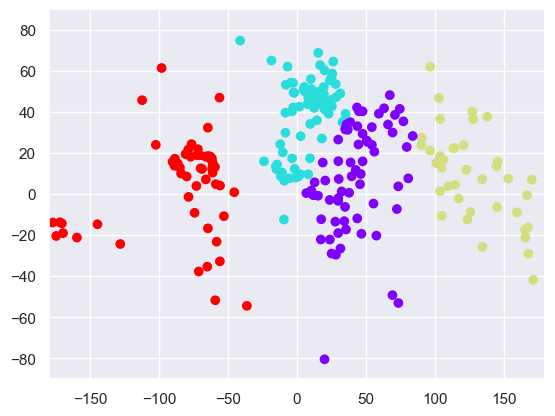

In [17]:
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

## Selecting the number of clusters

### WCSS

Use the ingerated <i>sklearn</i> method <i> 'inertia_' </i>.

In [18]:
kmeans.inertia_

256573.08675934296

Write a loop that calculates and saves the WCSS for any number of clusters from 1 up to 10 (or more if you wish).

In [46]:
wcss=[]

In [47]:
for i in range(2,10):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

In [48]:
wcss

[657012.0797586325,
 325235.52237055893,
 256573.08675934296,
 192217.11970120718,
 152258.0934631894,
 127549.31394168366,
 102873.25264457407,
 84967.41720068287]

### The Elbow Method

Text(0, 0.5, 'Within-cluster Sum of Squares')

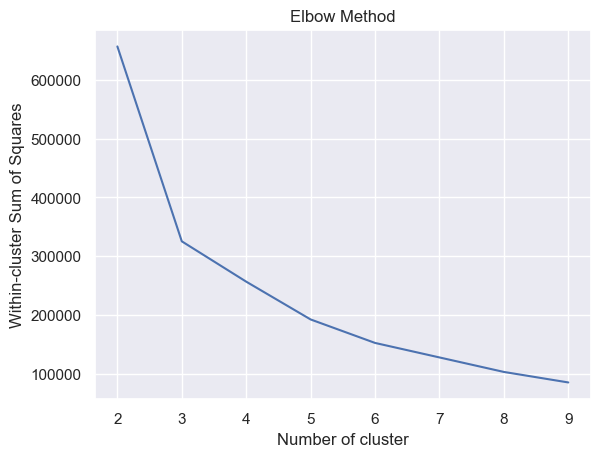

In [50]:
number_cluster = range(2,10)
plt.plot(number_cluster,wcss)

plt.title('Elbow Method')
plt.xlabel('Number of cluster')
plt.ylabel('Within-cluster Sum of Squares')

Based on the Elbow Curve, plot several graphs with the appropriate amounts of clusters you believe would best fit the data.

<ol> <b>Con</b>
    <li>What ideal numbers for KMeans</li>
    <li>Sensitive to initialzation</li>
    <li>Sensitive to outliers</li>
    <li>Produces spherical solutions</li>
    <li>Standardization</li>
</ol>

<ol> <b>Remedies</b>
    <li>Use the Elbow Method to find ideal number</li>
    <li>K-means++ in package, but if using other package do take note of what is their initialzaiton</li>
    <li>Remove outliers</li>
    <li>To Standardize or not to Standardize depend on the variable/goal we focusing on</li>
</ol>
